In [32]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('QALYs_data.csv')

# Preprocess categorical variables (if needed)
df['marital_status'] = df['marital_status'].astype('category')
df['marital_status'] = df['marital_status'].cat.codes + 1
df['gender'] = df['gender']


                            OLS Regression Results                            
Dep. Variable:                   HRQL   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     256.2
Date:                Tue, 21 May 2024   Prob (F-statistic):          2.41e-199
Time:                        17:55:44   Log-Likelihood:                -185.63
No. Observations:                1023   AIC:                             385.3
Df Residuals:                    1016   BIC:                             419.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

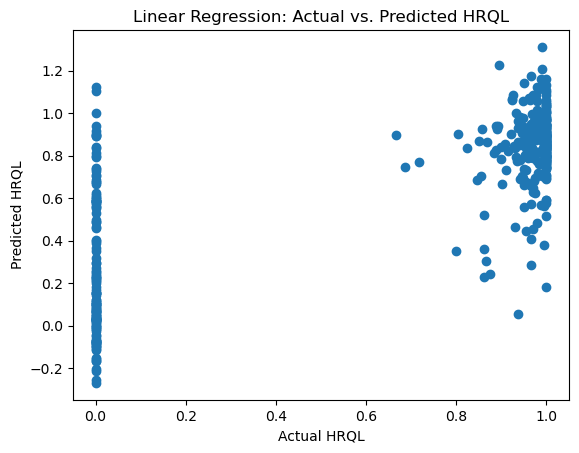

In [34]:
# Preprocess categorical variables (if needed)
df['marital_status'] = df['marital_status'].astype('category')
df['marital_status'] = df['marital_status'].cat.codes + 1
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes + 1

# Remove duplicate patient records, keep the last occurrence
df.sort_values(by='patient_id', ascending=True, inplace=True)
df.drop_duplicates(subset='patient_id', keep='last', inplace=True)

# Replace NaN values in 'HRQL' column with 0
df['HRQL'] = df['HRQL'].fillna(0)

# Define features (X) and target variable (y)
columns_to_drop = ['patient_id', 'HRQL', 'qaly_value']
X = df.drop(columns=columns_to_drop)
y = df['HRQL']

# Add a constant term for intercept
X = sm.add_constant(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and fit the OLS model using statsmodels
ols_model = sm.OLS(y_train, X_train).fit()

# Make predictions on test data
y_pred_test = ols_model.predict(X_test)

# Print the summary to check for significance of the coefficients
print(ols_model.summary())

# Visualize the predicted vs. actual HRQL using scatter plot
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual HRQL")
plt.ylabel("Predicted HRQL")
plt.title("Linear Regression: Actual vs. Predicted HRQL")
plt.show()
